In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('/Users/derya_ak/Desktop/AmazonReview.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [7]:
data['Review'].head()

0    fast shipping but this product is very cheaply...
1    this case takes so long to ship and it's not e...
2    good for not droids. not good for iphones. you...
3    the cable was not compatible between my macboo...
4    the case is nice but did not have a glow light...
Name: Review, dtype: object

In [4]:
# convert upper case to lower case
data['Review'] = data['Review'].str.lower()

In [6]:
data['Review'].head()

0    fast shipping but this product is very cheaply...
1    this case takes so long to ship and it's not e...
2    good for not droids. not good for iphones. you...
3    the cable was not compatible between my macboo...
4    the case is nice but did not have a glow light...
Name: Review, dtype: object

In [8]:
#remove all punctuations
import re
def regex(a):
    a = re.sub(r'[^\w\s]', '', str(a))
    return a 

In [9]:
data['Review'] = data['Review'].apply(lambda x: regex(x))

In [10]:
data['Review'] = data['Review'].str.replace('\d', '')

In [11]:
data['Review'].head()

0    fast shipping but this product is very cheaply...
1    this case takes so long to ship and its not ev...
2    good for not droids not good for iphones you c...
3    the cable was not compatible between my macboo...
4    the case is nice but did not have a glow light...
Name: Review, dtype: object

In [12]:
# find stopwords and remove from text for tokenization
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
data['Review'] = data['Review'].apply(lambda x: " ".join([x for x in str(x).split() if x not in (sw)]))
data['Review'].head()

0    fast shipping product cheaply made brought gra...
1             case takes long ship even worth dont buy
2    good droids good iphones cannot use features w...
3    cable compatible macbook iphone also connector...
4    case nice glow light im disappointed product d...
Name: Review, dtype: object

In [19]:
#number of words
number_of_words = pd.Series(' '.join(data['Review']).split()).value_counts()
number_of_words

one            7571
br             6836
case           6755
would          6532
good           6363
               ... 
scrubbrush        1
problemized       1
otterboxs         1
ntk               1
upgarde           1
Length: 34596, dtype: int64

In [20]:
#remove words which are only one
remove_word = number_of_words[number_of_words <= 1]
remove_word

countryside    1
asinbdqdcm     1
connectos      1
workedhad      1
bootup         1
              ..
scrubbrush     1
problemized    1
otterboxs      1
ntk            1
upgarde        1
Length: 18552, dtype: int64

In [21]:
data['Review'] = data['Review'].apply(lambda x: " ".join([x for x in str(x).split() if x not in (remove_word)]))
data['Review'].head()

0    fast shipping product cheaply made brought ipo...
1             case takes long ship even worth dont buy
2    good good iphones cannot use features watch ip...
3    cable compatible macbook iphone also connector...
4    case nice glow light im disappointed product d...
Name: Review, dtype: object

In [23]:
#thanks to to textblob we can extract nouns and adjectives from text. 
nltk.download("punkt")

from textblob import TextBlob, Word, Blobber

[nltk_data] Downloading package punkt to /Users/derya_ak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
data['Review'].apply(lambda x: TextBlob(x).words).head()

0    [fast, shipping, product, cheaply, made, broug...
1    [case, takes, long, ship, even, worth, dont, buy]
2    [good, good, iphones, can, not, use, features,...
3    [cable, compatible, macbook, iphone, also, con...
4    [case, nice, glow, light, im, disappointed, pr...
Name: Review, dtype: object

In [28]:
nltk.download('omw-1.4')
nltk.download('wordnet')
!python -m textblob.download_corpora

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package brown to /Users/derya_ak/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/derya_ak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/derya_ak/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [33]:
#lemmatize (normalize words)
data['Review'] = data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review'].head()

0    fast shipping product cheaply made brought ipo...
1              case take long ship even worth dont buy
2    good good iphones cannot use feature watch iph...
3    cable compatible macbook iphone also connector...
4    case nice glow light im disappointed product d...
Name: Review, dtype: object

In [34]:
#find out how many times words show up in the text
term_frequancy = data['Review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
term_frequancy.columns = ["words", "term_frequancy"]

In [38]:
term_frequancy.sort_values("term_frequancy", ascending = False)

,words,term_frequancy
132,work,8925.0
85,one,8015.0
19,case,7249.0
133,br,6836.0
12,would,6532.0
...,...,...
10879,postion,2.0
10880,sacrificed,2.0
10883,xv,2.0
10884,especial,2.0


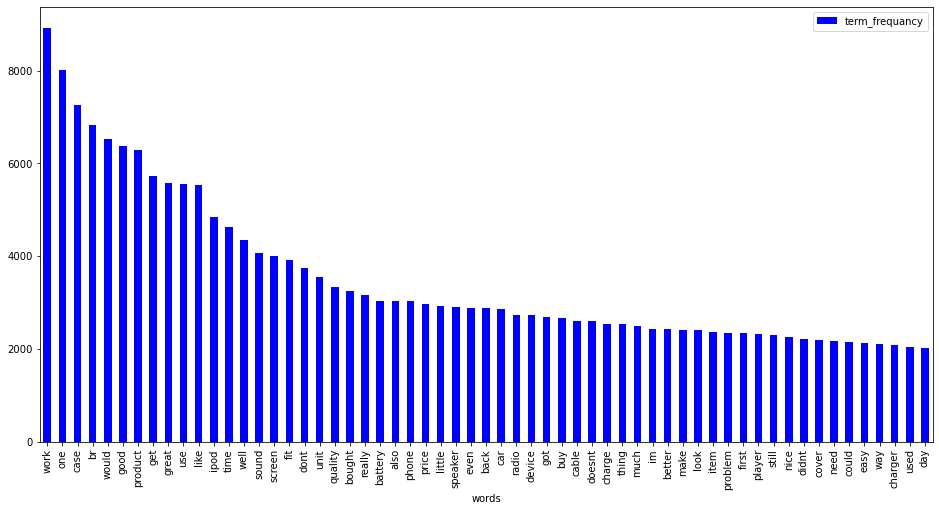

In [53]:
#visualize most frequent words
from matplotlib import pyplot as plt

term_frequancy_2 = term_frequancy[term_frequancy["term_frequancy"] > 2000].sort_values("term_frequancy", ascending=False)


fig, ax = plt.subplots(figsize=(16, 8))

term_frequancy_2.plot.bar(x="words", y="term_frequancy", color="blue", ax=ax)

plt.show()


In [56]:
#make it single text
text = " ".join(i for i in data['Review'])
text[0:10000]

'fast shipping product cheaply made brought ipod would protected fell skin suitable protection good decoration therefore rated case take long ship even worth dont buy good good iphones cannot use feature watch iphone wont synch iphone cable compatible macbook iphone also connector came apart cable started fraying case nice glow light im disappointed product didnt meet advertisement cable keep coming message accessory supported bought specifically led believe totally compatible iphone able charge iphone either cable ii throw trash waste money po broke phone u luckily able pull remnant tweezer stay away product suck hard hear wat saying music cut within sec like product one really disappointed aukey need go back drawing board yeah say mirror screen mean ipod becomes like mirror nearly impossible see actual screen direct sunlight power ac adapter tried several outlet confirmed usb cable worked wall adapter didnt im returning may shell apple brand one much hurt purchased product vendor out

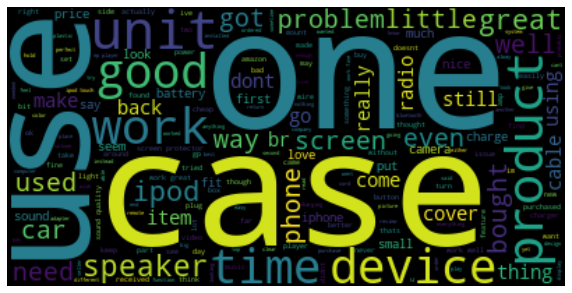

In [58]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
data['Review']

0        fast shipping product cheaply made brought ipo...
1                  case take long ship even worth dont buy
2        good good iphones cannot use feature watch iph...
3        cable compatible macbook iphone also connector...
4        case nice glow light im disappointed product d...
                               ...                        
24995    cable lightning far superior cable market even...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon wasnt color looked on...
24999    awsome loved little speaker great sound super ...
Name: Review, Length: 25000, dtype: object

In [72]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/derya_ak/nltk_data...


In [92]:
sia = SIA()
sia.polarity_scores("It is very nice to see you")

{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.4754}

In [93]:
data["Polarity_Score"] = data['Review'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [94]:
data.loc[(data["Polarity_Score"] < 0.0) & (data["Sentiment"] > 3.0)].head()

,Review,Sentiment,Polarity_Score,SentimentLabel
15004,read code let erase basic model job ive used h...,4,-0.6808,0
15023,use travel charged iphone nexus samsung others...,4,-0.2960,0
15025,hey say job alright quality terriblebr figure ...,4,-0.4939,0
15073,installed new kenwood ddxhd stereo siriusxm sx...,4,-0.8867,0
15084,good case pandigital novel ereader came advert...,4,-0.1650,0


In [96]:
data["SentimentLabel"] = data["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [97]:
data["SentimentLabel"].value_counts()

pos    18157
neg     6843
Name: SentimentLabel, dtype: int64

In [98]:
data.groupby("SentimentLabel")["Sentiment"].mean()

SentimentLabel
neg    2.104048
pos    3.337666
Name: Sentiment, dtype: float64